In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', None)

In [ ]:
file_path = '/content/bquxjob_1dbc57db_18f7e2b295b.csv'
original_df = pd.read_csv(file_path)

In [ ]:
original_df.shape

(528, 19)

In [ ]:
file_path = '/content/final (1).csv'
final_df = pd.read_csv(file_path)

In [ ]:
final_df.shape

(528, 29)

In [ ]:
original_df.rename(columns={'TVDBID': 'TVDB ID'}, inplace=True)

In [ ]:
df = pd.merge(original_df, final_df, on='TVDB ID', how='inner', suffixes=('_orig', '_cast'))

In [ ]:
df.shape

(528, 47)

In [ ]:
df.to_csv("df.csv", index=False)

In [ ]:
df.head(1)

Id        Show Platform     Airdate   Taxonomy Status_orig   Genre                                                                                             PosterPath  TVDB ID       ShowType                                                                                                                                                                                                                                                                                                                                  OverView  TotalSeason  TotalEpisode  EpisodesperSeason  CreatedBy                 CreatedDate  ModifiedBy                ModifiedDate  IsDeleted      ID        Name                                                                                                                Overview  Popularity                                                          Poster Path                                                        Backdrop Path First Air Date Origin Country Original Language  Vote Average  Vote Count       Status_cast  Runtime             Genres                            Tmdb URL  Season        Networks                                                                     Production Companies               Created By                                       Videos    IMDb ID Instagram ID Twitter ID                                                                                                                                                                                                       Keywords  Total Cast                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
# Count the total number of shows by taxonomy type
taxonomy_count = df['Taxonomy'].value_counts()

# Display the counts
taxonomy_count

Taxonomy
Serial        352
Munchable      92
Anthology      50
Standalone     34
Name: count, dtype: int64

In [ ]:
Platform_count = df['Platform'].value_counts()
Platform_count

Platform
Netflix                          119
Hulu                              84
HBO Max                           61
Amazon Prime                      53
Peacock                           52
Apple TV +                        41
Paramount +                       36
Disney +                          30
Showtime                          12
Discovery +                       11
AMC +                              8
Hulu, HBO Max                      3
Starz                              3
HBO Max, Hulu                      2
Hulu, Paramount +, Showtime        1
AMC +, Hulu                        1
ABC, Hulu                          1
Netflix, Apple TV +                1
Hulu, Netflix                      1
HBO Max, Peacock                   1
Netflix, Peacock                   1
Hulu, Paramount +                  1
PBS Kids                           1
HBO Max, Netflix, Paramount +      1
Disney +, Hulu                     1
Hulu, Peacock                      1
Netflix, Showtime            

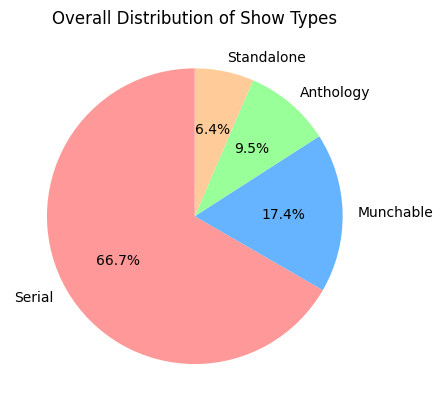

In [ ]:
import matplotlib.pyplot as plt

# Create a pie chart for the overall distribution of show types
fig, ax = plt.subplots()
taxonomy_count.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax.set_ylabel('')  # Remove the y-label as it is not necessary for pie charts
ax.set_title('Overall Distribution of Show Types')
plt.show()

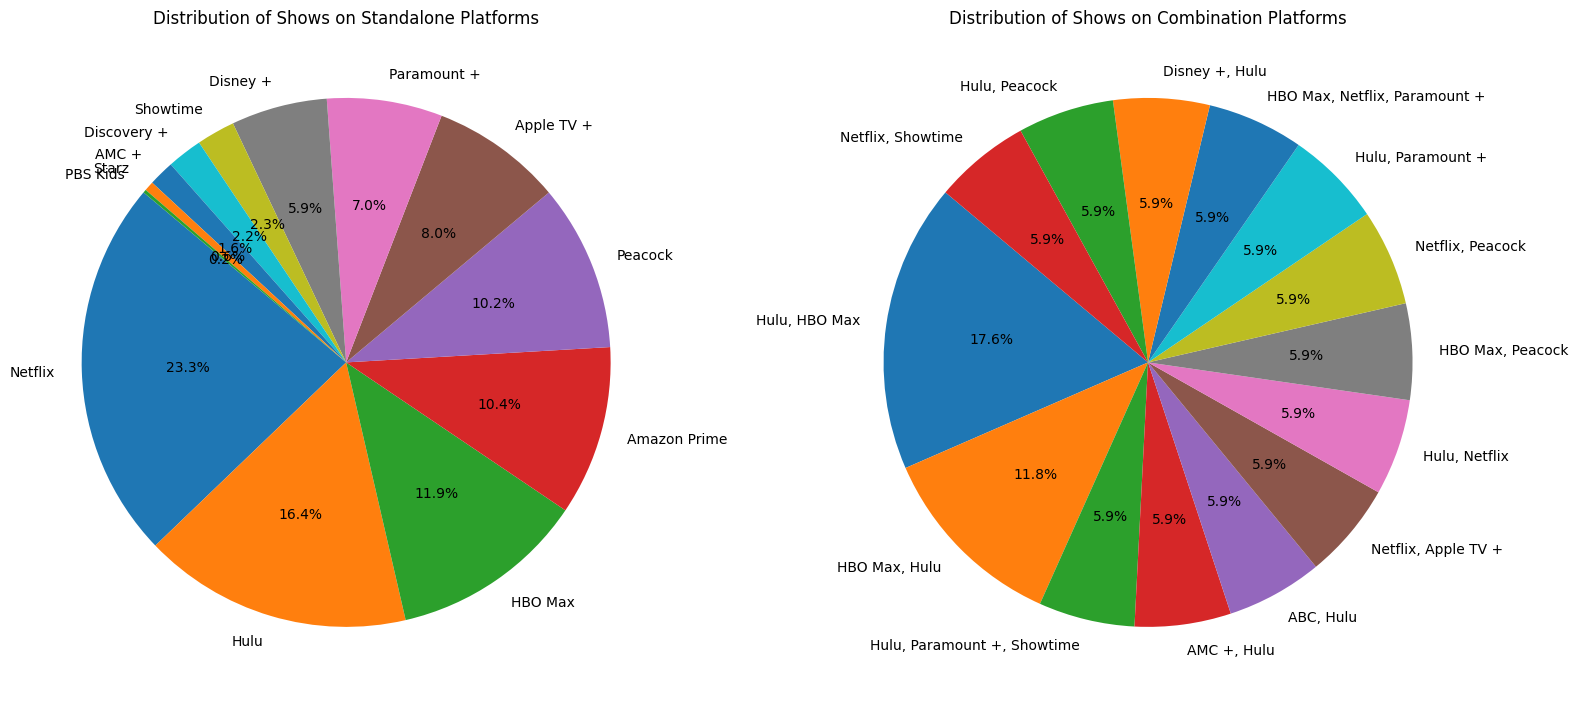

In [ ]:
# Count the number of shows for standalone platforms and combinations
platform_counts = df['Platform'].value_counts()

# Separate counts for standalone platforms from platform combinations
standalone_platforms = platform_counts[platform_counts.index.map(lambda x: ',' not in x)]
combination_platforms = platform_counts[platform_counts.index.map(lambda x: ',' in x)]

# Generate pie charts for standalone platforms and combinations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.pie(standalone_platforms, labels=standalone_platforms.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribution of Shows on Standalone Platforms')
ax2.pie(combination_platforms, labels=combination_platforms.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribution of Shows on Combination Platforms')
plt.tight_layout()
plt.show()

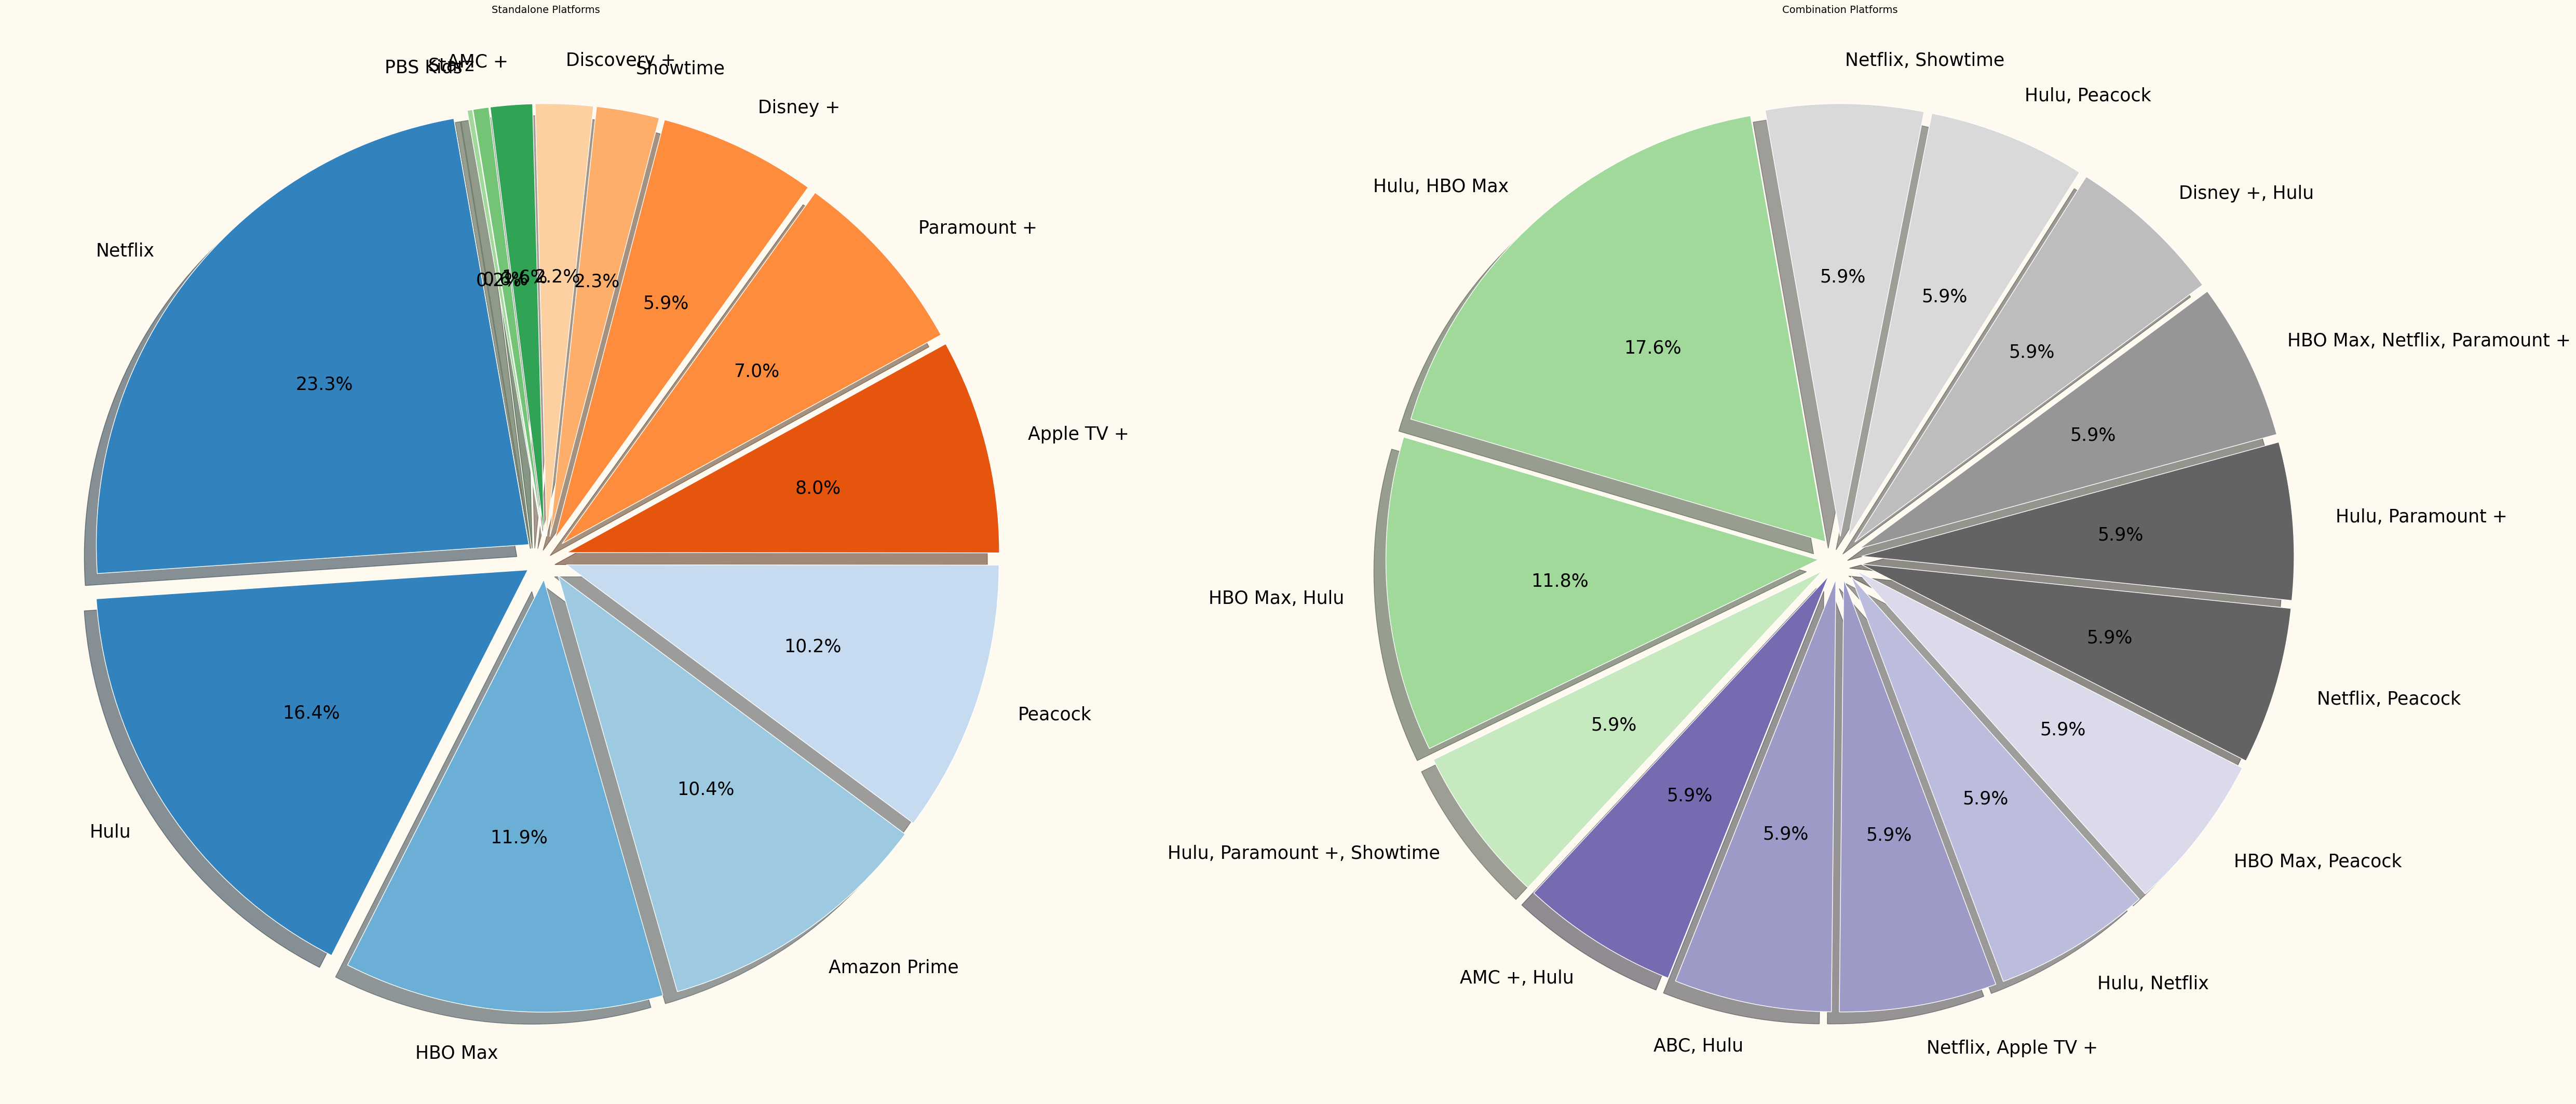

In [ ]:
import numpy as np

# Creating a vibrant color palette
colors_standalone = plt.get_cmap('tab20c')(np.linspace(0, 0.5, len(standalone_platforms)))
colors_combination = plt.get_cmap('tab20c')(np.linspace(0.5, 1, len(combination_platforms)))

# Setting explode values for emphasis
explode_standalone = [0.05] * len(standalone_platforms)
explode_combination = [0.05] * len(combination_platforms)

# Create the pie charts with enhanced aesthetic features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 25))

# Pie chart for standalone platforms
ax1.pie(standalone_platforms, labels=standalone_platforms.index, autopct='%1.1f%%', startangle=100,
        colors=colors_standalone, explode=explode_standalone, shadow=True, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 25})
ax1.set_title('Standalone Platforms', fontsize=14)

# Pie chart for combination platforms
ax2.pie(combination_platforms, labels=combination_platforms.index, autopct='%1.1f%%', startangle=100,
        colors=colors_combination, explode=explode_combination, shadow=True, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 25})
ax2.set_title('Combination Platforms', fontsize=14)

# Set overall figure background color
fig.set_facecolor('floralwhite')
ax1.set_facecolor('azure')
ax2.set_facecolor('azure')

plt.tight_layout()
plt.show()



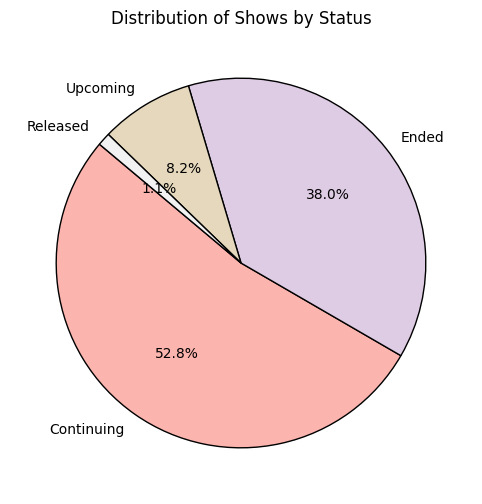

In [ ]:
# Display unique values in the 'Status_orig' and 'Genre' columns to verify the data
status_distribution = df['Status_orig'].value_counts()
genre_distribution = df['Genre'].value_counts()

status_distribution, genre_distribution.head()  # Show top 5 genres for brevity

# Define custom colors for aesthetics
colors_status = plt.get_cmap('Pastel1')(np.linspace(0, 1, len(status_distribution)))

# Create the pie chart for show status
plt.figure(figsize=(10, 6))
plt.pie(status_distribution, labels=status_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors_status, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Shows by Status')
plt.show()


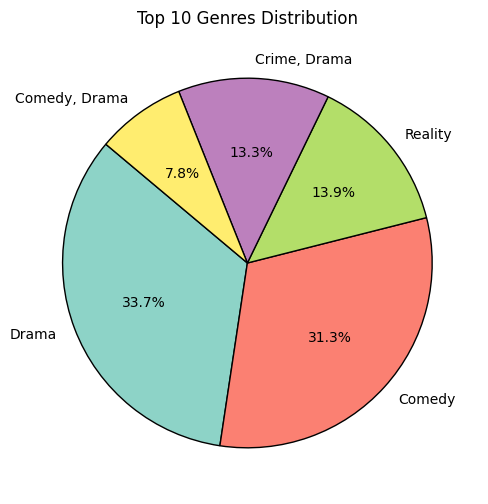

In [ ]:
# For the genre distribution, only take the top 10 genres for clarity
top_genres = genre_distribution.head(5)
colors_genre = plt.get_cmap('Set3')(np.linspace(0, 1, len(top_genres)))

# Create the pie chart for top genres
plt.figure(figsize=(10, 6))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=colors_genre, wedgeprops={'edgecolor': 'black'})
plt.title('Top 10 Genres Distribution')
plt.show()

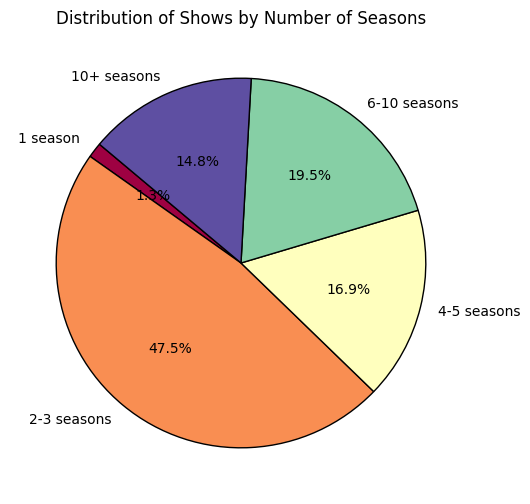

In [ ]:
# Extract the 'TotalSeason' column and drop any missing values
season_counts = df['TotalSeason'].dropna()

# Categorizing the number of seasons
season_categories = pd.cut(season_counts, bins=[0, 1, 3, 5, 10, float('inf')], right=False, labels=['1 season', '2-3 seasons', '4-5 seasons', '6-10 seasons', '10+ seasons'])

# Count the number of shows in each category
season_distribution = season_categories.value_counts().sort_index()

# Define custom colors
colors_seasons = plt.get_cmap('Spectral')(np.linspace(0, 1, len(season_distribution)))

# Generate the pie chart
plt.figure(figsize=(10, 6))
plt.pie(season_distribution, labels=season_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors_seasons, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Shows by Number of Seasons')
plt.show()

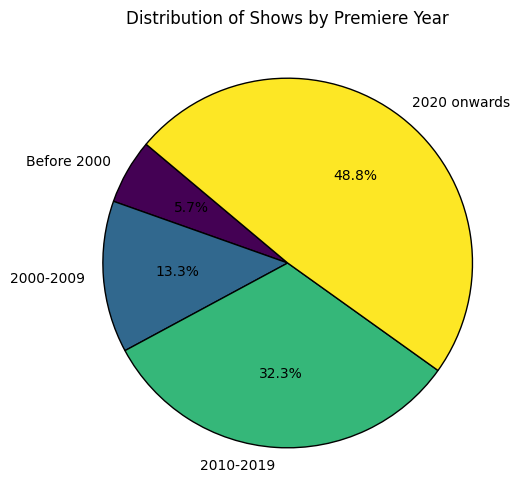

In [ ]:
# Extracting the year from the 'Airdate' column
df['Year'] = pd.to_datetime(df['Airdate'], errors='coerce').dt.year.dropna()

# Categorizing the years into different time periods
year_bins = [0, 2000, 2010, 2020, float('inf')]
year_labels = ['Before 2000', '2000-2009', '2010-2019', '2020 onwards']
year_categories = pd.cut(df['Year'], bins=year_bins, labels=year_labels, right=False)

# Counting the number of shows in each category
year_distribution = year_categories.value_counts().sort_index()

# Define custom colors
colors_years = plt.get_cmap('viridis')(np.linspace(0, 1, len(year_distribution)))

# Generate the pie chart
plt.figure(figsize=(10, 6))
plt.pie(year_distribution, labels=year_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors_years, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Shows by Premiere Year')
plt.show()


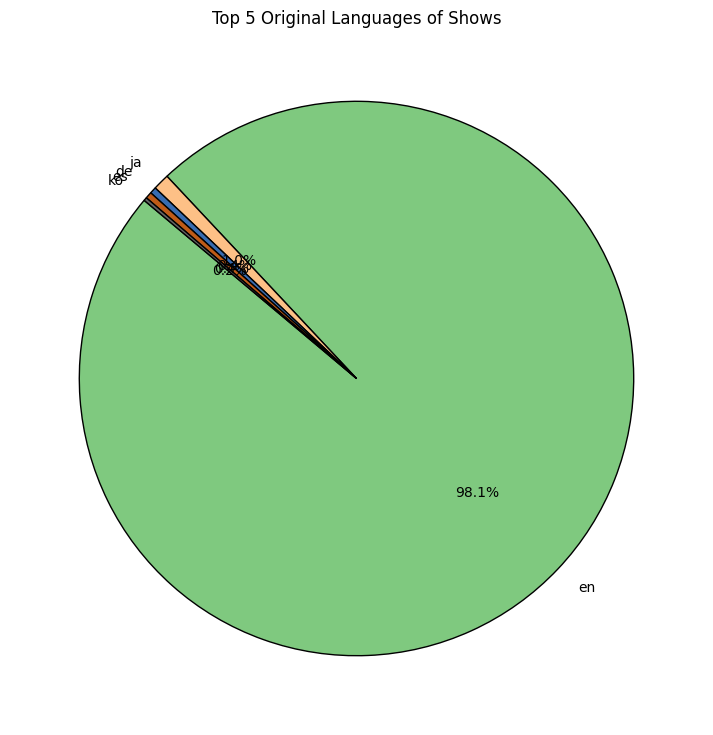

In [ ]:
# Checking the unique values in the 'Original Language' column
language_distribution = df['Original Language'].value_counts()

# Since there might be many languages with small counts, we'll focus on the top 5 languages for clarity
top_languages = language_distribution.head(5)

# Define custom colors
colors_languages = plt.get_cmap('Accent')(np.linspace(0, 1, len(top_languages)))

# Generate the pie chart for the top 5 original languages
plt.figure(figsize=(9, 9))
plt.pie(top_languages, labels=top_languages.index, autopct='%1.1f%%', startangle=140, colors=colors_languages, wedgeprops={'edgecolor': 'black'})
plt.title('Top 5 Original Languages of Shows')
plt.show()

In [ ]:
# Splitting the 'Production Companies' into individual company names and flattening the list
individual_companies = df['Production Companies'].dropna().str.split(', ').explode()

# Counting the occurrences of each production company
individual_company_distribution = individual_companies.value_counts()

# Displaying the top 10 individual production companies for clarity
top_individual_companies = individual_company_distribution.head(10)

top_individual_companies

Production Companies
Warner Bros. Television             39
Universal Television                31
Amazon Studios                      28
20th Television                     24
CBS Studios                         24
Sony Pictures Television Studios    21
FX Productions                      19
HBO                                 17
20th Century Fox Television         17
3 Arts Entertainment                14
Name: count, dtype: int64

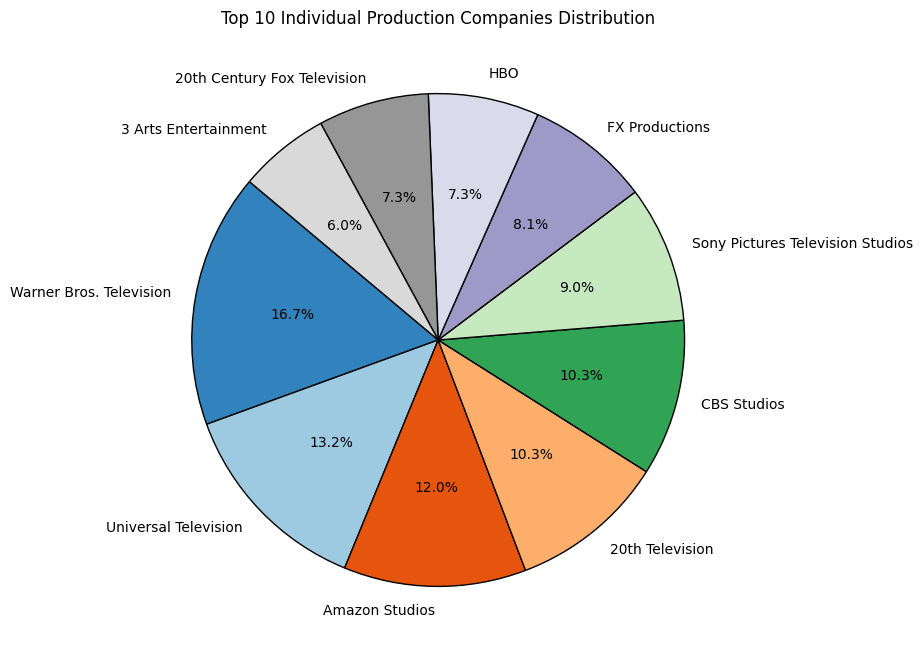

In [ ]:
# Define custom colors for the top individual production companies
colors_individual_companies = plt.get_cmap('tab20c')(np.linspace(0, 1, len(top_individual_companies)))

# Generate the pie chart for top individual production companies
plt.figure(figsize=(10, 8))
plt.pie(top_individual_companies, labels=top_individual_companies.index, autopct='%1.1f%%', startangle=140, colors=colors_individual_companies, wedgeprops={'edgecolor': 'black'})
plt.title('Top 10 Individual Production Companies Distribution')
plt.show()